In [1]:
# Import dependencies
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read in data
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
print(df["koi_disposition"].unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


# Select features (columns)

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.1212619 , 0.16740114, 0.13894328, 0.05057845, 0.01178615,
       0.01428722, 0.01367595, 0.01278633, 0.04130021, 0.02594322,
       0.01220383, 0.01049449, 0.00956023, 0.01845492, 0.02913296,
       0.02270227, 0.02570224, 0.01370306, 0.01078957, 0.01256289,
       0.01041643, 0.01045836, 0.01357801, 0.00925004, 0.00874892,
       0.00912025, 0.02753839, 0.00742153, 0.01111205, 0.01791455,
       0.01304411, 0.01106754, 0.00908361, 0.01579307, 0.00988916,
       0.01085827, 0.00918419, 0.01230249, 0.00962805, 0.01032068])

In [6]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.167401
koi_fpflag_co        0.138943
koi_fpflag_nt        0.121262
koi_fpflag_ec        0.050578
koi_time0bk_err1     0.041300
koi_duration_err1    0.029133
koi_model_snr        0.027538
koi_time0bk_err2     0.025943
koi_depth            0.025702
koi_duration_err2    0.022702
dtype: float64

In [7]:
# Set features based on feature importances
X = df[feat_imp.index]

# Use koi_disposition for y values
y = df['koi_disposition']

# Create a Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find Best K

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 1, Train: 1.000, Test: 0.842
k: 3, Train: 0.922, Test: 0.866
k: 5, Train: 0.906, Test: 0.872
k: 7, Train: 0.899, Test: 0.878
k: 9, Train: 0.897, Test: 0.880
k: 11, Train: 0.893, Test: 0.879
k: 13, Train: 0.891, Test: 0.879
k: 15, Train: 0.888, Test: 0.883
k: 17, Train: 0.885, Test: 0.884
k: 19, Train: 0.885, Test: 0.885
k: 21, Train: 0.885, Test: 0.883
k: 23, Train: 0.886, Test: 0.881
k: 25, Train: 0.884, Test: 0.879
k: 27, Train: 0.882, Test: 0.878
k: 29, Train: 0.882, Test: 0.876


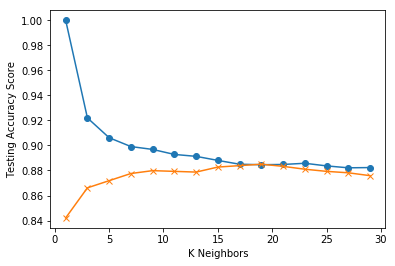

In [20]:
import matplotlib.pyplot as plt

# Plot training and testing scores
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Train the Model
Using a k=19

In [26]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print(f"Train Accuracy: {knn.score(X_test_scaled, y_test)}")

Train Accuracy: 0.8850114416475973


# Predict

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [39]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV model
param_grid = {'C':np.logspace(-4, 4, 20),
             'penalty':['l1','l2']}

grid = GridSearchCV(classifier, param_grid, verbose=3)

In [40]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify 

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.241, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.241, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.241, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.501, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.501, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.501, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1 ............................
[CV]  C=0.00026

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] .. C=0.004832930238571752, penalty=l2, score=0.538, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2 ..............................
[CV] .. C=0.004832930238571752, penalty=l2, score=0.586, total=   0.0s
[CV] C=0.012742749857031334, penalty=l1 ..............................
[CV] .. C=0.012742749857031334, penalty=l1, score=0.739, total=   0.0s
[CV] C=0.012742749857031334, penalty=l1 ..............................
[CV] .. C=0.012742749857031334, penalty=l1, score=0.747, total=   0.0s
[CV] C=0.012742749857031334, penalty=l1 ..............................
[CV] .. C=0.012742749857031334, penalty=l1, score=0.741, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2 ..............................
[CV] .. C=0.012742749857031334, penalty=l2, score=0.755, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2 ..............................
[CV] .. C=0.012742749857031334, penalty=l2, score=0.758, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2 ..............................
[CV] .

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ... C=0.03359818286283781, penalty=l1, score=0.748, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1 ...............................
[CV] ... C=0.03359818286283781, penalty=l1, score=0.743, total=   0.1s
[CV] C=0.03359818286283781, penalty=l2 ...............................
[CV] ... C=0.03359818286283781, penalty=l2, score=0.789, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2 ...............................
[CV] ... C=0.03359818286283781, penalty=l2, score=0.789, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2 ...............................
[CV] ... C=0.03359818286283781, penalty=l2, score=0.774, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1 ...............................
[CV] ... C=0.08858667904100823, penalty=l1, score=0.820, total=   0.1s
[CV] C=0.08858667904100823, penalty=l1 ...............................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ... C=0.08858667904100823, penalty=l1, score=0.823, total=   0.1s
[CV] C=0.08858667904100823, penalty=l1 ...............................
[CV] ... C=0.08858667904100823, penalty=l1, score=0.807, total=   0.1s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV] ... C=0.08858667904100823, penalty=l2, score=0.821, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV] ... C=0.08858667904100823, penalty=l2, score=0.824, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV] ... C=0.08858667904100823, penalty=l2, score=0.809, total=   0.0s
[CV] C=0.23357214690901212, penalty=l1 ...............................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ... C=0.23357214690901212, penalty=l1, score=0.825, total=   0.1s
[CV] C=0.23357214690901212, penalty=l1 ...............................
[CV] ... C=0.23357214690901212, penalty=l1, score=0.827, total=   0.0s
[CV] C=0.23357214690901212, penalty=l1 ...............................
[CV] ... C=0.23357214690901212, penalty=l1, score=0.811, total=   0.1s
[CV] C=0.23357214690901212, penalty=l2 ...............................
[CV] ... C=0.23357214690901212, penalty=l2, score=0.820, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2 ...............................
[CV] ... C=0.23357214690901212, penalty=l2, score=0.828, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2 ...............................
[CV] ... C=0.23357214690901212, penalty=l2, score=0.809, total=   0.0s
[CV] C=0.615848211066026, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=0.615848211066026, penalty=l1, score=0.846, total=   0.1s
[CV] C=0.615848211066026, penalty=l1 .................................
[CV] ..... C=0.615848211066026, penalty=l1, score=0.842, total=   0.1s
[CV] C=0.615848211066026, penalty=l1 .................................
[CV] ..... C=0.615848211066026, penalty=l1, score=0.843, total=   0.1s
[CV] C=0.615848211066026, penalty=l2 .................................
[CV] ..... C=0.615848211066026, penalty=l2, score=0.825, total=   0.0s
[CV] C=0.615848211066026, penalty=l2 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=0.615848211066026, penalty=l2, score=0.828, total=   0.0s
[CV] C=0.615848211066026, penalty=l2 .................................
[CV] ..... C=0.615848211066026, penalty=l2, score=0.812, total=   0.0s
[CV] C=1.623776739188721, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=1.623776739188721, penalty=l1, score=0.852, total=   0.2s
[CV] C=1.623776739188721, penalty=l1 .................................
[CV] ..... C=1.623776739188721, penalty=l1, score=0.849, total=   0.2s
[CV] C=1.623776739188721, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=1.623776739188721, penalty=l1, score=0.851, total=   0.1s
[CV] C=1.623776739188721, penalty=l2 .................................
[CV] ..... C=1.623776739188721, penalty=l2, score=0.825, total=   0.0s
[CV] C=1.623776739188721, penalty=l2 .................................
[CV] ..... C=1.623776739188721, penalty=l2, score=0.832, total=   0.0s
[CV] C=1.623776739188721, penalty=l2 .................................
[CV] ..... C=1.623776739188721, penalty=l2, score=0.821, total=   0.0s
[CV] C=4.281332398719396, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=4.281332398719396, penalty=l1, score=0.856, total=   0.4s
[CV] C=4.281332398719396, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=4.281332398719396, penalty=l1, score=0.850, total=   0.3s
[CV] C=4.281332398719396, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=4.281332398719396, penalty=l1, score=0.853, total=   0.5s
[CV] C=4.281332398719396, penalty=l2 .................................
[CV] ..... C=4.281332398719396, penalty=l2, score=0.829, total=   0.0s
[CV] C=4.281332398719396, penalty=l2 .................................
[CV] ..... C=4.281332398719396, penalty=l2, score=0.832, total=   0.0s
[CV] C=4.281332398719396, penalty=l2 .................................
[CV] ..... C=4.281332398719396, penalty=l2, score=0.831, total=   0.0s
[CV] C=11.288378916846883, penalty=l1 ................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] .... C=11.288378916846883, penalty=l1, score=0.858, total=   1.0s
[CV] C=11.288378916846883, penalty=l1 ................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=11.288378916846883, penalty=l1, score=0.852, total=   1.2s
[CV] C=11.288378916846883, penalty=l1 ................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=11.288378916846883, penalty=l1, score=0.854, total=   0.8s
[CV] C=11.288378916846883, penalty=l2 ................................
[CV] .... C=11.288378916846883, penalty=l2, score=0.847, total=   0.0s
[CV] C=11.288378916846883, penalty=l2 ................................
[CV] .... C=11.288378916846883, penalty=l2, score=0.838, total=   0.0s
[CV] C=11.288378916846883, penalty=l2 ................................
[CV] .... C=11.288378916846883, penalty=l2, score=0.844, total=   0.0s
[CV] C=29.763514416313132, penalty=l1 ................................
[CV] .... C=29.763514416313132, penalty=l1, score=0.862, total=   0.0s
[CV] C=29.763514416313132, penalty=l1 ................................
[CV] .... C=29.763514416313132, penalty=l1, score=0.854, total=   0.1s
[CV] C=29.763514416313132, penalty=l1 ................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] .... C=29.763514416313132, penalty=l1, score=0.854, total=   0.1s
[CV] C=29.763514416313132, penalty=l2 ................................
[CV] .... C=29.763514416313132, penalty=l2, score=0.851, total=   0.1s
[CV] C=29.763514416313132, penalty=l2 ................................
[CV] .... C=29.763514416313132, penalty=l2, score=0.848, total=   0.0s
[CV] C=29.763514416313132, penalty=l2 ................................
[CV] .... C=29.763514416313132, penalty=l2, score=0.848, total=   0.0s
[CV] C=78.47599703514607, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=78.47599703514607, penalty=l1, score=0.863, total=   0.1s
[CV] C=78.47599703514607, penalty=l1 .................................
[CV] ..... C=78.47599703514607, penalty=l1, score=0.854, total=   0.1s
[CV] C=78.47599703514607, penalty=l1 .................................
[CV] ..... C=78.47599703514607, penalty=l1, score=0.856, total=   0.1s
[CV] C=78.47599703514607, penalty=l2 .................................
[CV] ..... C=78.47599703514607, penalty=l2, score=0.852, total=   0.1s
[CV] C=78.47599703514607, penalty=l2 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=78.47599703514607, penalty=l2, score=0.851, total=   0.1s
[CV] C=78.47599703514607, penalty=l2 .................................
[CV] ..... C=78.47599703514607, penalty=l2, score=0.852, total=   0.0s
[CV] C=206.913808111479, penalty=l1 ..................................
[CV] ...... C=206.913808111479, penalty=l1, score=0.863, total=   0.0s
[CV] C=206.913808111479, penalty=l1 ..................................
[CV] ...... C=206.913808111479, penalty=l1, score=0.854, total=   0.0s
[CV] C=206.913808111479, penalty=l1 ..................................
[CV] ...... C=206.913808111479, penalty=l1, score=0.856, total=   0.1s
[CV] C=206.913808111479, penalty=l2 ..................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ...... C=206.913808111479, penalty=l2, score=0.856, total=   0.0s
[CV] C=206.913808111479, penalty=l2 ..................................
[CV] ...... C=206.913808111479, penalty=l2, score=0.851, total=   0.0s
[CV] C=206.913808111479, penalty=l2 ..................................
[CV] ...... C=206.913808111479, penalty=l2, score=0.853, total=   0.0s
[CV] C=545.5594781168514, penalty=l1 .................................
[CV] ..... C=545.5594781168514, penalty=l1, score=0.863, total=   0.0s
[CV] C=545.5594781168514, penalty=l1 .................................
[CV] ..... C=545.5594781168514, penalty=l1, score=0.854, total=   0.0s
[CV] C=545.5594781168514, penalty=l1 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=545.5594781168514, penalty=l1, score=0.856, total=   0.0s
[CV] C=545.5594781168514, penalty=l2 .................................
[CV] ..... C=545.5594781168514, penalty=l2, score=0.859, total=   0.0s
[CV] C=545.5594781168514, penalty=l2 .................................
[CV] ..... C=545.5594781168514, penalty=l2, score=0.851, total=   0.0s
[CV] C=545.5594781168514, penalty=l2 .................................
[CV] ..... C=545.5594781168514, penalty=l2, score=0.853, total=   0.1s
[CV] C=1438.44988828766, penalty=l1 ..................................
[CV] ...... C=1438.44988828766, penalty=l1, score=0.863, total=   0.1s
[CV] C=1438.44988828766, penalty=l1 ..................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ...... C=1438.44988828766, penalty=l1, score=0.855, total=   0.1s
[CV] C=1438.44988828766, penalty=l1 ..................................
[CV] ...... C=1438.44988828766, penalty=l1, score=0.856, total=   0.1s
[CV] C=1438.44988828766, penalty=l2 ..................................
[CV] ...... C=1438.44988828766, penalty=l2, score=0.860, total=   0.1s
[CV] C=1438.44988828766, penalty=l2 ..................................
[CV] ...... C=1438.44988828766, penalty=l2, score=0.852, total=   0.0s
[CV] C=1438.44988828766, penalty=l2 ..................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ...... C=1438.44988828766, penalty=l2, score=0.855, total=   0.0s
[CV] C=3792.690190732246, penalty=l1 .................................
[CV] ..... C=3792.690190732246, penalty=l1, score=0.863, total=   0.1s
[CV] C=3792.690190732246, penalty=l1 .................................
[CV] ..... C=3792.690190732246, penalty=l1, score=0.855, total=   0.1s
[CV] C=3792.690190732246, penalty=l1 .................................
[CV] ..... C=3792.690190732246, penalty=l1, score=0.856, total=   0.1s
[CV] C=3792.690190732246, penalty=l2 .................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ..... C=3792.690190732246, penalty=l2, score=0.862, total=   0.1s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV] ..... C=3792.690190732246, penalty=l2, score=0.854, total=   0.1s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV] ..... C=3792.690190732246, penalty=l2, score=0.855, total=   0.1s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] ............... C=10000.0, penalty=l1, score=0.863, total=   0.1s
[CV] C=10000.0, penalty=l1 ...........................................


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ............... C=10000.0, penalty=l1, score=0.855, total=   0.1s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] ............... C=10000.0, penalty=l1, score=0.856, total=   0.1s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............... C=10000.0, penalty=l2, score=0.863, total=   0.1s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............... C=10000.0, penalty=l2, score=0.854, total=   0.0s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............... C=10000.0, penalty=l2, score=0.856, total=   0.1s


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    8.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00...3,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
     

In [41]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1438.44988828766, 'penalty': 'l1'}
0.8579057791340835


# Save the Model

In [ ]:
import joblib
filename = 'name.sav'
joblib.dump(my_model, filename)